In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
data = pd.read_csv("CATEGORYDATA.csv")

In [19]:
data = data.drop("production_companies", axis=1)

In [20]:
# Assuming 'data' is your DataFrame and 'production_countries' is a column
data['production_countries'] = data['production_countries'].apply(lambda x: x.split(',')[0] if isinstance(x, str) else x)


In [21]:
#len(data.production_countries.value_counts())
#import pandas as pd

data = data[data['revenue'] >= 1000000]
data.sort_values(by='revenue', ascending=False, inplace=True)


In [22]:
len(data.production_countries.value_counts())

61

In [23]:
#data.production_countries.value_counts().head(30)
data = pd.concat([data.drop("production_countries", axis=1), pd.get_dummies(data["production_countries"]).add_prefix("production_countries_")], axis=1)
#data = pd.concat([data.drop("native-country", axis = 1), pd.get_dummies(data["native-country"]).add_prefix("native-country")], axis = 1)


In [30]:
correlations = data.corr()["revenue"].abs()
correlations

revenue                                          1.000000
production_countries_Algeria                     0.004966
production_countries_Argentina                   0.014652
production_countries_Australia                   0.005036
production_countries_Austria                     0.017196
                                                   ...   
production_countries_Ukraine                     0.006044
production_countries_United Arab Emirates        0.006486
production_countries_United Kingdom              0.033727
production_countries_United States of America    0.068858
production_countries_Uruguay                     0.006493
Name: revenue, Length: 62, dtype: float64

In [27]:
# The .corr() function calculates the correlation coefficient between every pair of numeric columns(the range of the coefficients is between -1 and 1)
# However when you have data.corr()["income"] it only retrieves the coefficients between "income" and the other feature columns, so returns only one column of cofficients
#the .abs() returns every coefficient in the positive (abosolute value)
sorted_correlations = correlations.sort_values() # Sorts the order of the coefficients from smallest to biggest
num_cols_to_drop = int(0.8 * len(data.columns))	# this line is used to find the number of columns we are gonna remove in the visualizations, finds total number
#of columns and multiply by 0.8 and rounds the number, try printing each part
cols_to_drop = sorted_correlations.iloc[:num_cols_to_drop].index
data_dropped = data.drop(cols_to_drop, axis=1)
print(int(len(data.columns) * 0.5))

31


<Axes: >

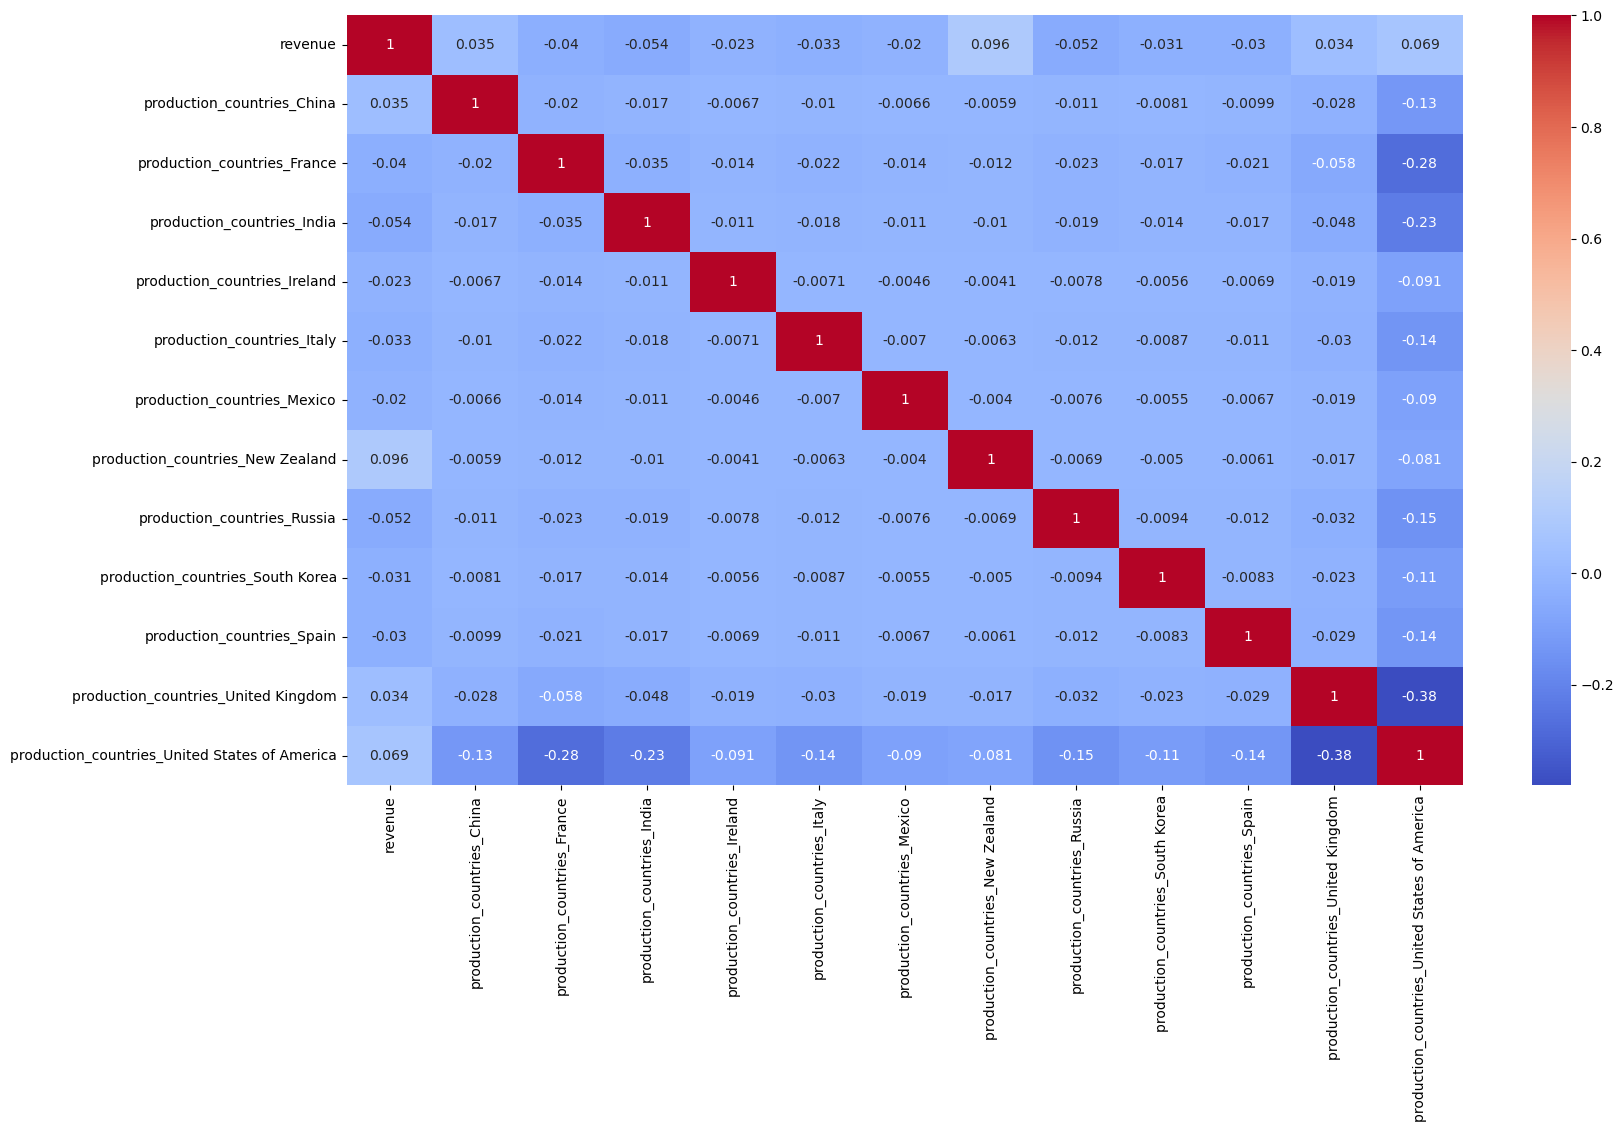

In [28]:
plt.figure(figsize=(18, 10))
sns.heatmap(data_dropped.corr(), annot = True, cmap ="coolwarm")